#### Import Libraries

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import math

import warnings
warnings.filterwarnings('ignore')

#### Dataset Attributes 

In [7]:
index_names = ['unit_number', 'time_cycles']
setting_names = ['setting_1', 'setting_2', 'setting_3']
sensor_names = ['Fan_Inlet_Temperature', 'LPC_Outlet_Temperature', 'HPC_Outlet_Temperature', 'LPT Outlet Temperature', 'Fan Inlet Pressure', 'Bypass-Duct Pressure', 
                'HPC Outlet Pressure', 'Physical Fan Speed', 'Physical Core Speed', 'Engine Pressure Ratio(P50/P2)', 'HPC Outlet Static Pressure',
                'Ratio of Fuel Flow to Ps30', 'Corrected Fan Speed', 'Corrected Core Speed', 'Bypass Ratio', 
                'Burner Fuel-Air Ratio', 'Bleed Enthalpy', 'Required Fan Speed', 'Required Fan Conversion Speed', 'High-Pressure Turbines Cool Air Flow', 'Low-Pressure Turbines Cool Air Flow']

column_names = index_names + setting_names + sensor_names

#### Import Dataset

In [8]:
file_path1 = "/home/sarantis/Documents/Federated-Learning-Project/CMaps/train_FD001.txt" 
FD1_Train =  pd.read_csv(file_path1, delimiter=' ', header = None, index_col = False, names = column_names)

file_path2 = "/home/sarantis/Documents/Federated-Learning-Project/CMaps/test_FD001.txt" 
FD1_Test =  pd.read_csv(file_path2, delimiter=' ', header = None, index_col = False, names = column_names)

file_path3 = '/home/sarantis/Documents/Federated-Learning-Project/CMaps/RUL_FD001.txt'
FD1_y_Test = pd.read_csv(file_path3, header = None,  names=['RUL'])
Fed_y_Test = pd.read_csv(file_path3, header = None,  names=['RUL'])

#### Attributes Correlation

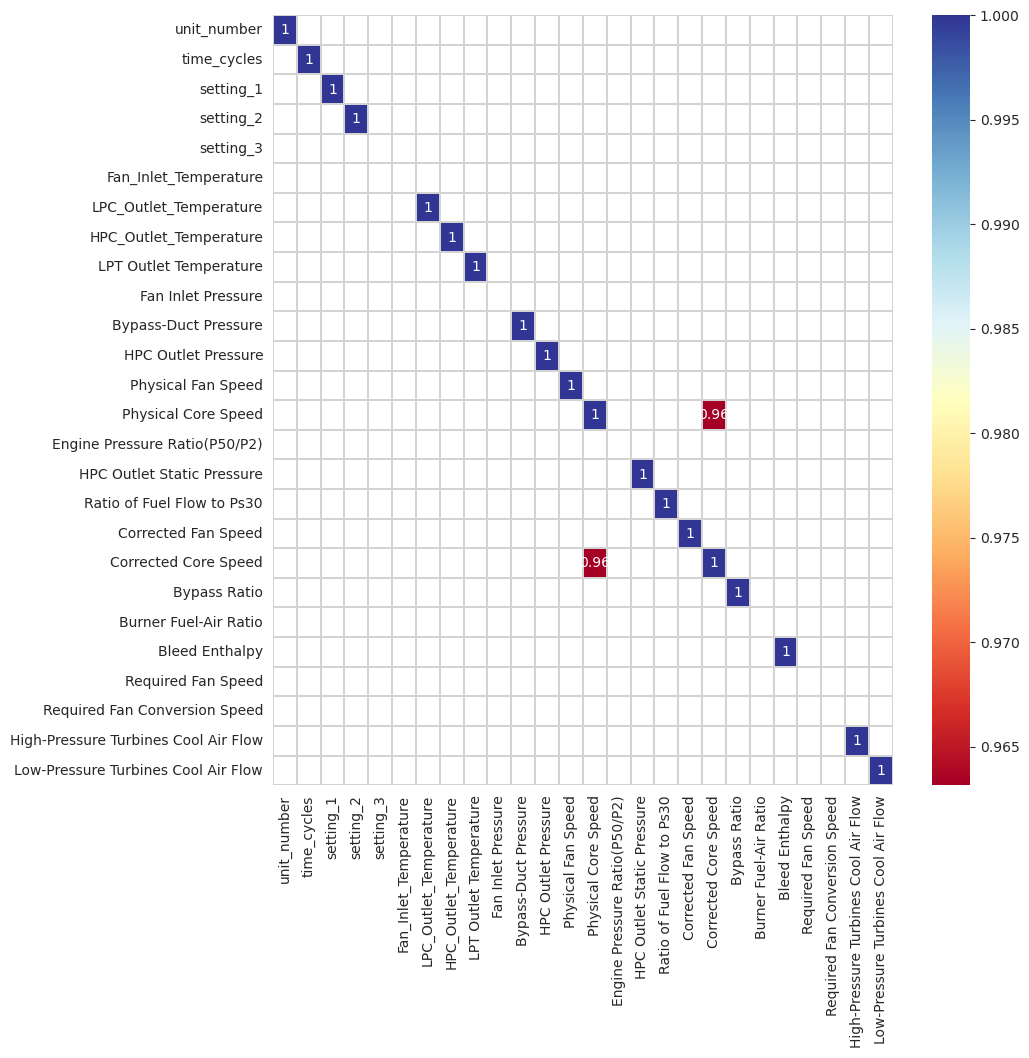

In [9]:
plt.figure(figsize=(10,10))
threshold = 0.90
sns.set_style("whitegrid", {"axes.facecolor": ".0"})
correlation_matrix = FD1_Train.corr()
mask = correlation_matrix.where((abs(correlation_matrix) >= threshold)).isna()
plot_kws={"s": 1}
sns.heatmap(correlation_matrix,
            cmap='RdYlBu',
            annot=True,
            mask=mask,
            linewidths=0.2, 
            linecolor='lightgrey').set_facecolor('white')

In [10]:
# Drop Constant Attributes
constant_columns = FD1_Train.columns[FD1_Train.std() < 0.000001]
print(constant_columns)

FD1_Train.drop(constant_columns,axis=1,inplace=True)
FD1_Test.drop(constant_columns,axis=1,inplace=True)

Index(['setting_3', 'Fan_Inlet_Temperature', 'Fan Inlet Pressure',
       'Engine Pressure Ratio(P50/P2)', 'Burner Fuel-Air Ratio',
       'Required Fan Speed', 'Required Fan Conversion Speed'],
      dtype='object')


In [11]:
# Drop highly correlated attributes
upper_tri = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
corr_features = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(corr_features)

FD1_Train.drop(corr_features, axis=1, inplace=True)
FD1_Test.drop(corr_features, axis=1, inplace=True)

['Corrected Core Speed']


In [12]:
FD1_Train.head()

,unit_number,time_cycles,setting_1,setting_2,LPC_Outlet_Temperature,HPC_Outlet_Temperature,LPT Outlet Temperature,Bypass-Duct Pressure,HPC Outlet Pressure,Physical Fan Speed,Physical Core Speed,HPC Outlet Static Pressure,Ratio of Fuel Flow to Ps30,Corrected Fan Speed,Bypass Ratio,Bleed Enthalpy,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044


In [13]:
print('Shape of the train dataset : ', FD1_Train.shape)
print('Shape of the validation dataset : ', FD1_Test.shape)

missing_values = FD1_Train.isna().sum()
print("Columns with missing values:\n", missing_values)

missing_values = FD1_Test.isna().sum()
print("\nColumns with missing values:\n", missing_values)

Shape of the train dataset :  (20631, 18)
Shape of the validation dataset :  (13096, 18)
Columns with missing values:
 unit_number                             0
time_cycles                             0
setting_1                               0
setting_2                               0
LPC_Outlet_Temperature                  0
HPC_Outlet_Temperature                  0
LPT Outlet Temperature                  0
Bypass-Duct Pressure                    0
HPC Outlet Pressure                     0
Physical Fan Speed                      0
Physical Core Speed                     0
HPC Outlet Static Pressure              0
Ratio of Fuel Flow to Ps30              0
Corrected Fan Speed                     0
Bypass Ratio                            0
Bleed Enthalpy                          0
High-Pressure Turbines Cool Air Flow    0
Low-Pressure Turbines Cool Air Flow     0
dtype: int64

Columns with missing values:
 unit_number                             0
time_cycles                            

#### Add RUL Column in FD_Train

In [14]:
unit_lifetime = FD1_Train.groupby('unit_number')['time_cycles'].max()

unit_lifetime = FD1_Train.groupby('unit_number')['time_cycles'].transform('max')

# Set1 Train
FD1_Train['RUL'] = unit_lifetime - FD1_Train['time_cycles']
unit_rul_df_train = FD1_Train[['unit_number', 'RUL']]
display(unit_rul_df_train)

,unit_number,RUL
0,1,191
1,1,190
2,1,189
3,1,188
4,1,187
...,...,...
20626,100,4
20627,100,3
20628,100,2
20629,100,1


In [15]:
# Upper Limit for RUL
FD1_Train['RUL'][FD1_Train['RUL']>130]=130
FD1_Train.head()

,unit_number,time_cycles,setting_1,setting_2,LPC_Outlet_Temperature,HPC_Outlet_Temperature,LPT Outlet Temperature,Bypass-Duct Pressure,HPC Outlet Pressure,Physical Fan Speed,Physical Core Speed,HPC Outlet Static Pressure,Ratio of Fuel Flow to Ps30,Corrected Fan Speed,Bypass Ratio,Bleed Enthalpy,High-Pressure Turbines Cool Air Flow,Low-Pressure Turbines Cool Air Flow,RUL
0,1,1,-0.0007,-0.0004,641.82,1589.70,1400.60,21.61,554.36,2388.06,9046.19,47.47,521.66,2388.02,8.4195,392,39.06,23.4190,130
1,1,2,0.0019,-0.0003,642.15,1591.82,1403.14,21.61,553.75,2388.04,9044.07,47.49,522.28,2388.07,8.4318,392,39.00,23.4236,130
2,1,3,-0.0043,0.0003,642.35,1587.99,1404.20,21.61,554.26,2388.08,9052.94,47.27,522.42,2388.03,8.4178,390,38.95,23.3442,130
3,1,4,0.0007,0.0000,642.35,1582.79,1401.87,21.61,554.45,2388.11,9049.48,47.13,522.86,2388.08,8.3682,392,38.88,23.3739,130
4,1,5,-0.0019,-0.0002,642.37,1582.85,1406.22,21.61,554.00,2388.06,9055.15,47.28,522.19,2388.04,8.4294,393,38.90,23.4044,130


In [16]:
from scipy.stats import f_oneway

FD1_X_Train = FD1_Train.drop(columns=['RUL', 'unit_number'])
FD1_y_Train = FD1_Train['RUL']

feature_scores = {}
for feature in FD1_X_Train.columns:
    samples = [FD1_X_Train[feature][FD1_y_Train == value] for value in FD1_y_Train.unique()]

    f_statistic, p_value = f_oneway(*samples)
    feature_scores[feature] = p_value

sorted_features = sorted(feature_scores, key=feature_scores.get)
print("Two best features based on p-values:", sorted_features[:3])
print("Two worst features based on p-values:", sorted_features[-2:])

# Drop the two worst features
worst_features = sorted_features[-2:]
FD1_X_Train = FD1_X_Train.drop(columns=worst_features)
FD1_X_Test = FD1_Test.groupby('unit_number').last().reset_index()
FD1_X_Test = FD1_X_Test.drop(columns=worst_features + ['unit_number'])

Two best features based on p-values: ['time_cycles', 'LPC_Outlet_Temperature', 'HPC_Outlet_Temperature']
Two worst features based on p-values: ['setting_2', 'setting_1']


In [17]:
Fed_X_Train = FD1_Train.drop(columns=['RUL'])
Fed_y_Train = FD1_Train['RUL']

feature_scores = {}
for feature in Fed_X_Train.columns:
    if feature != 'unit_number':  
        samples = [Fed_X_Train[feature][Fed_y_Train == value] for value in Fed_y_Train.unique()]

        f_statistic, p_value = f_oneway(*samples)
        feature_scores[feature] = p_value

sorted_features = sorted(feature_scores, key=feature_scores.get)
print("Two best features based on p-values:", sorted_features[:3])
print("Two worst features based on p-values:", sorted_features[-2:])

worst_features = sorted_features[-2:]
Fed_X_Train = Fed_X_Train.drop(columns=worst_features)
Fed_X_Test = FD1_Test.groupby('unit_number').last().reset_index()
Fed_X_Test = Fed_X_Test.drop(columns=worst_features)

Two best features based on p-values: ['time_cycles', 'LPC_Outlet_Temperature', 'HPC_Outlet_Temperature']
Two worst features based on p-values: ['setting_2', 'setting_1']


#### Average Values at last 5 cycles

In [18]:
Last5_X_Test = FD1_Test.groupby('unit_number').tail(5)
#print(Last5_X_Test)

Last_5_X_Test = Last5_X_Test.drop(columns=worst_features + ['unit_number'])

#### Scaling

In [19]:
scaler = MinMaxScaler()
FD1_X_Train_sc = pd.DataFrame(scaler.fit_transform(FD1_X_Train), columns=FD1_X_Train.columns)
FD1_X_Test_sc = pd.DataFrame(scaler.fit_transform(FD1_X_Test), columns=FD1_X_Test.columns)
Last_5_X_Test_sc = pd.DataFrame(scaler.fit_transform(Last_5_X_Test), columns=Last_5_X_Test.columns)

In [20]:
scaler = StandardScaler()
FD1_X_Train_st = pd.DataFrame(scaler.fit_transform(FD1_X_Train), columns=FD1_X_Train.columns)
FD1_X_Test_st = pd.DataFrame(scaler.fit_transform(FD1_X_Test), columns=FD1_X_Test.columns)
Last_5_X_Test_st = pd.DataFrame(scaler.fit_transform(Last_5_X_Test), columns=Last_5_X_Test.columns)

Fed_X_Train_st = pd.DataFrame(scaler.fit_transform(Fed_X_Train), columns=Fed_X_Train.columns)
Fed_X_Test_st = pd.DataFrame(scaler.fit_transform(Fed_X_Test), columns=Fed_X_Test.columns)

#### Store The values

In [21]:
%store FD1_X_Train_sc
%store FD1_X_Test_sc

%store FD1_X_Train_st
%store FD1_X_Test_st

%store FD1_y_Train
%store FD1_y_Test

%store FD1_Train
%store FD1_Test

%store FD1_X_Train
%store FD1_X_Test

%store Last_5_X_Test
%store Last_5_X_Test_sc

Stored 'FD1_X_Train_sc' (DataFrame)
Stored 'FD1_X_Test_sc' (DataFrame)
Stored 'FD1_X_Train_st' (DataFrame)
Stored 'FD1_X_Test_st' (DataFrame)
Stored 'FD1_y_Train' (Series)
Stored 'FD1_y_Test' (DataFrame)
Stored 'FD1_Train' (DataFrame)
Stored 'FD1_Test' (DataFrame)
Stored 'FD1_X_Train' (DataFrame)
Stored 'FD1_X_Test' (DataFrame)
Stored 'Last_5_X_Test' (DataFrame)
Stored 'Last_5_X_Test_sc' (DataFrame)


#### Store Dataframes for Federated Learning

In [22]:
%store Fed_X_Train_st
%store Fed_X_Test_st

%store Fed_y_Train
%store Fed_y_Test

Stored 'Fed_X_Train_st' (DataFrame)
Stored 'Fed_X_Test_st' (DataFrame)
Stored 'Fed_y_Train' (Series)
Stored 'Fed_y_Test' (DataFrame)
